In [313]:
# IMPORT THE LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

In [275]:
# LETS LOAD THE DATAFILE

data = pd.read_csv(r"D:\USL Case study\Country-data.csv")

In [276]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### LETS EXPLORE THE DATA

In [277]:
data.shape

(167, 10)

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


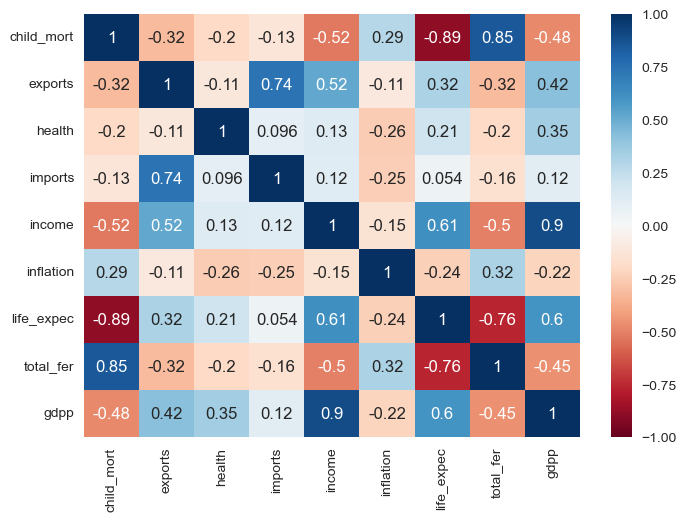

In [279]:
# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,cmap='RdBu')
plt.show()

In [280]:
# LETS VISUALISE THE DATA

data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [281]:
# Before we begin visualisation lets convert country to index as its a redundant column.

data.set_index('country',inplace=True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


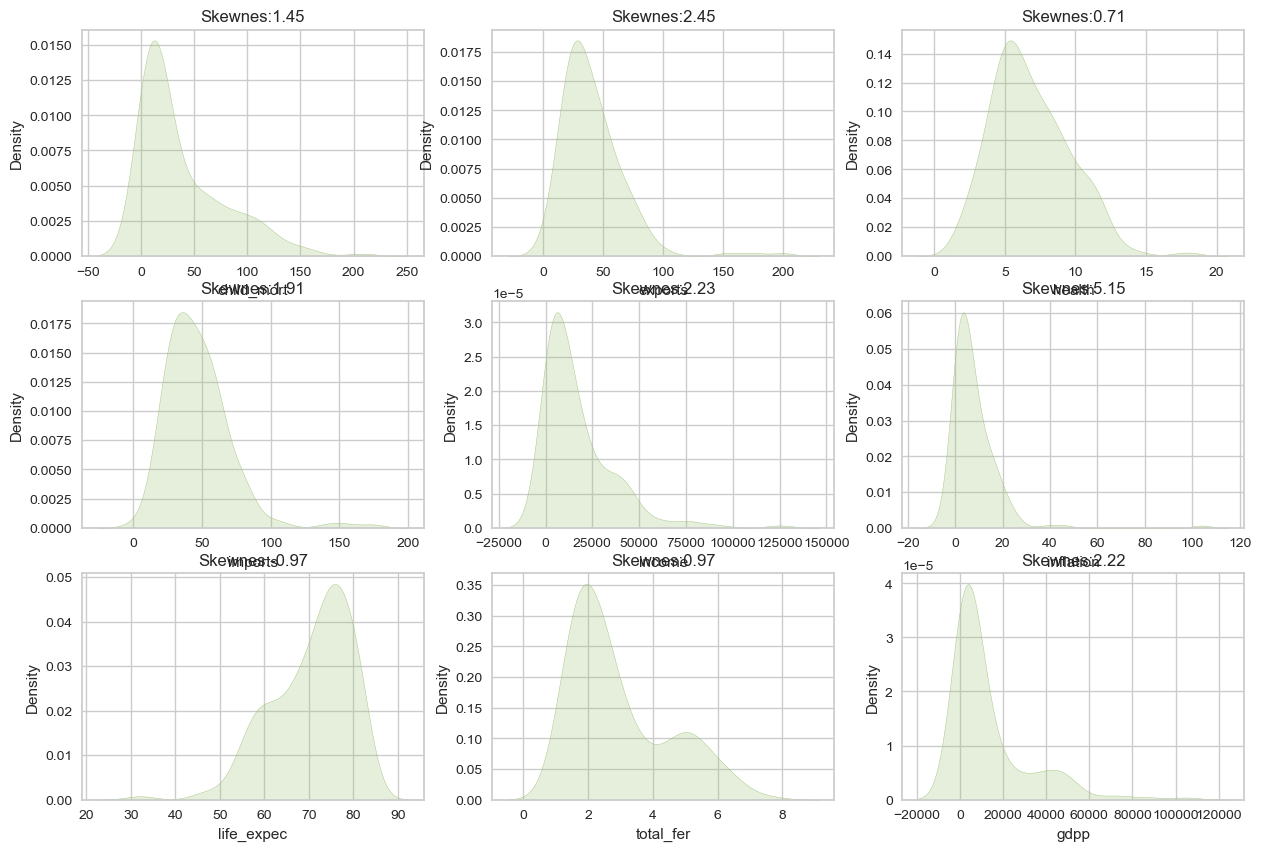

In [282]:
# Lets do the Univariate Analysis
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='g')
    plt.title(f'Skewnes:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout
plt.show()

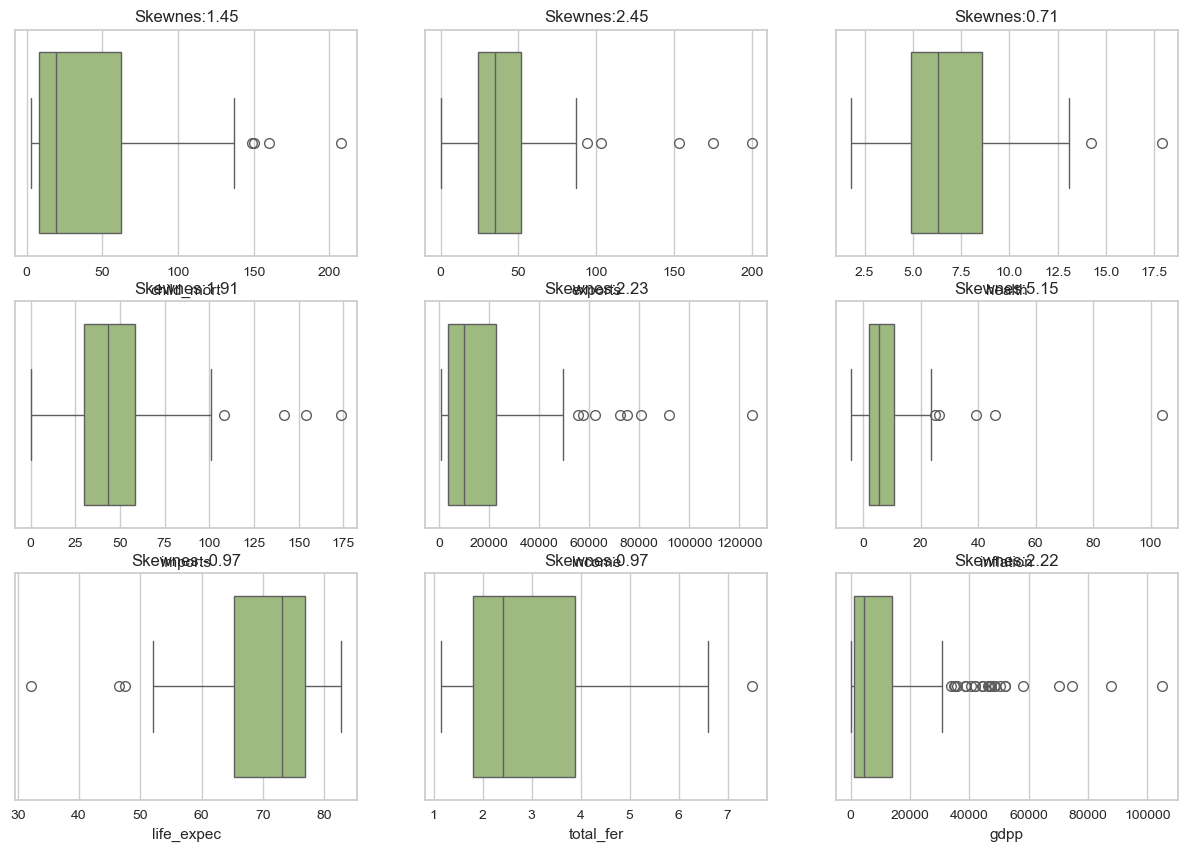

In [283]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='g')
    plt.title(f'Skewnes:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout
plt.show()

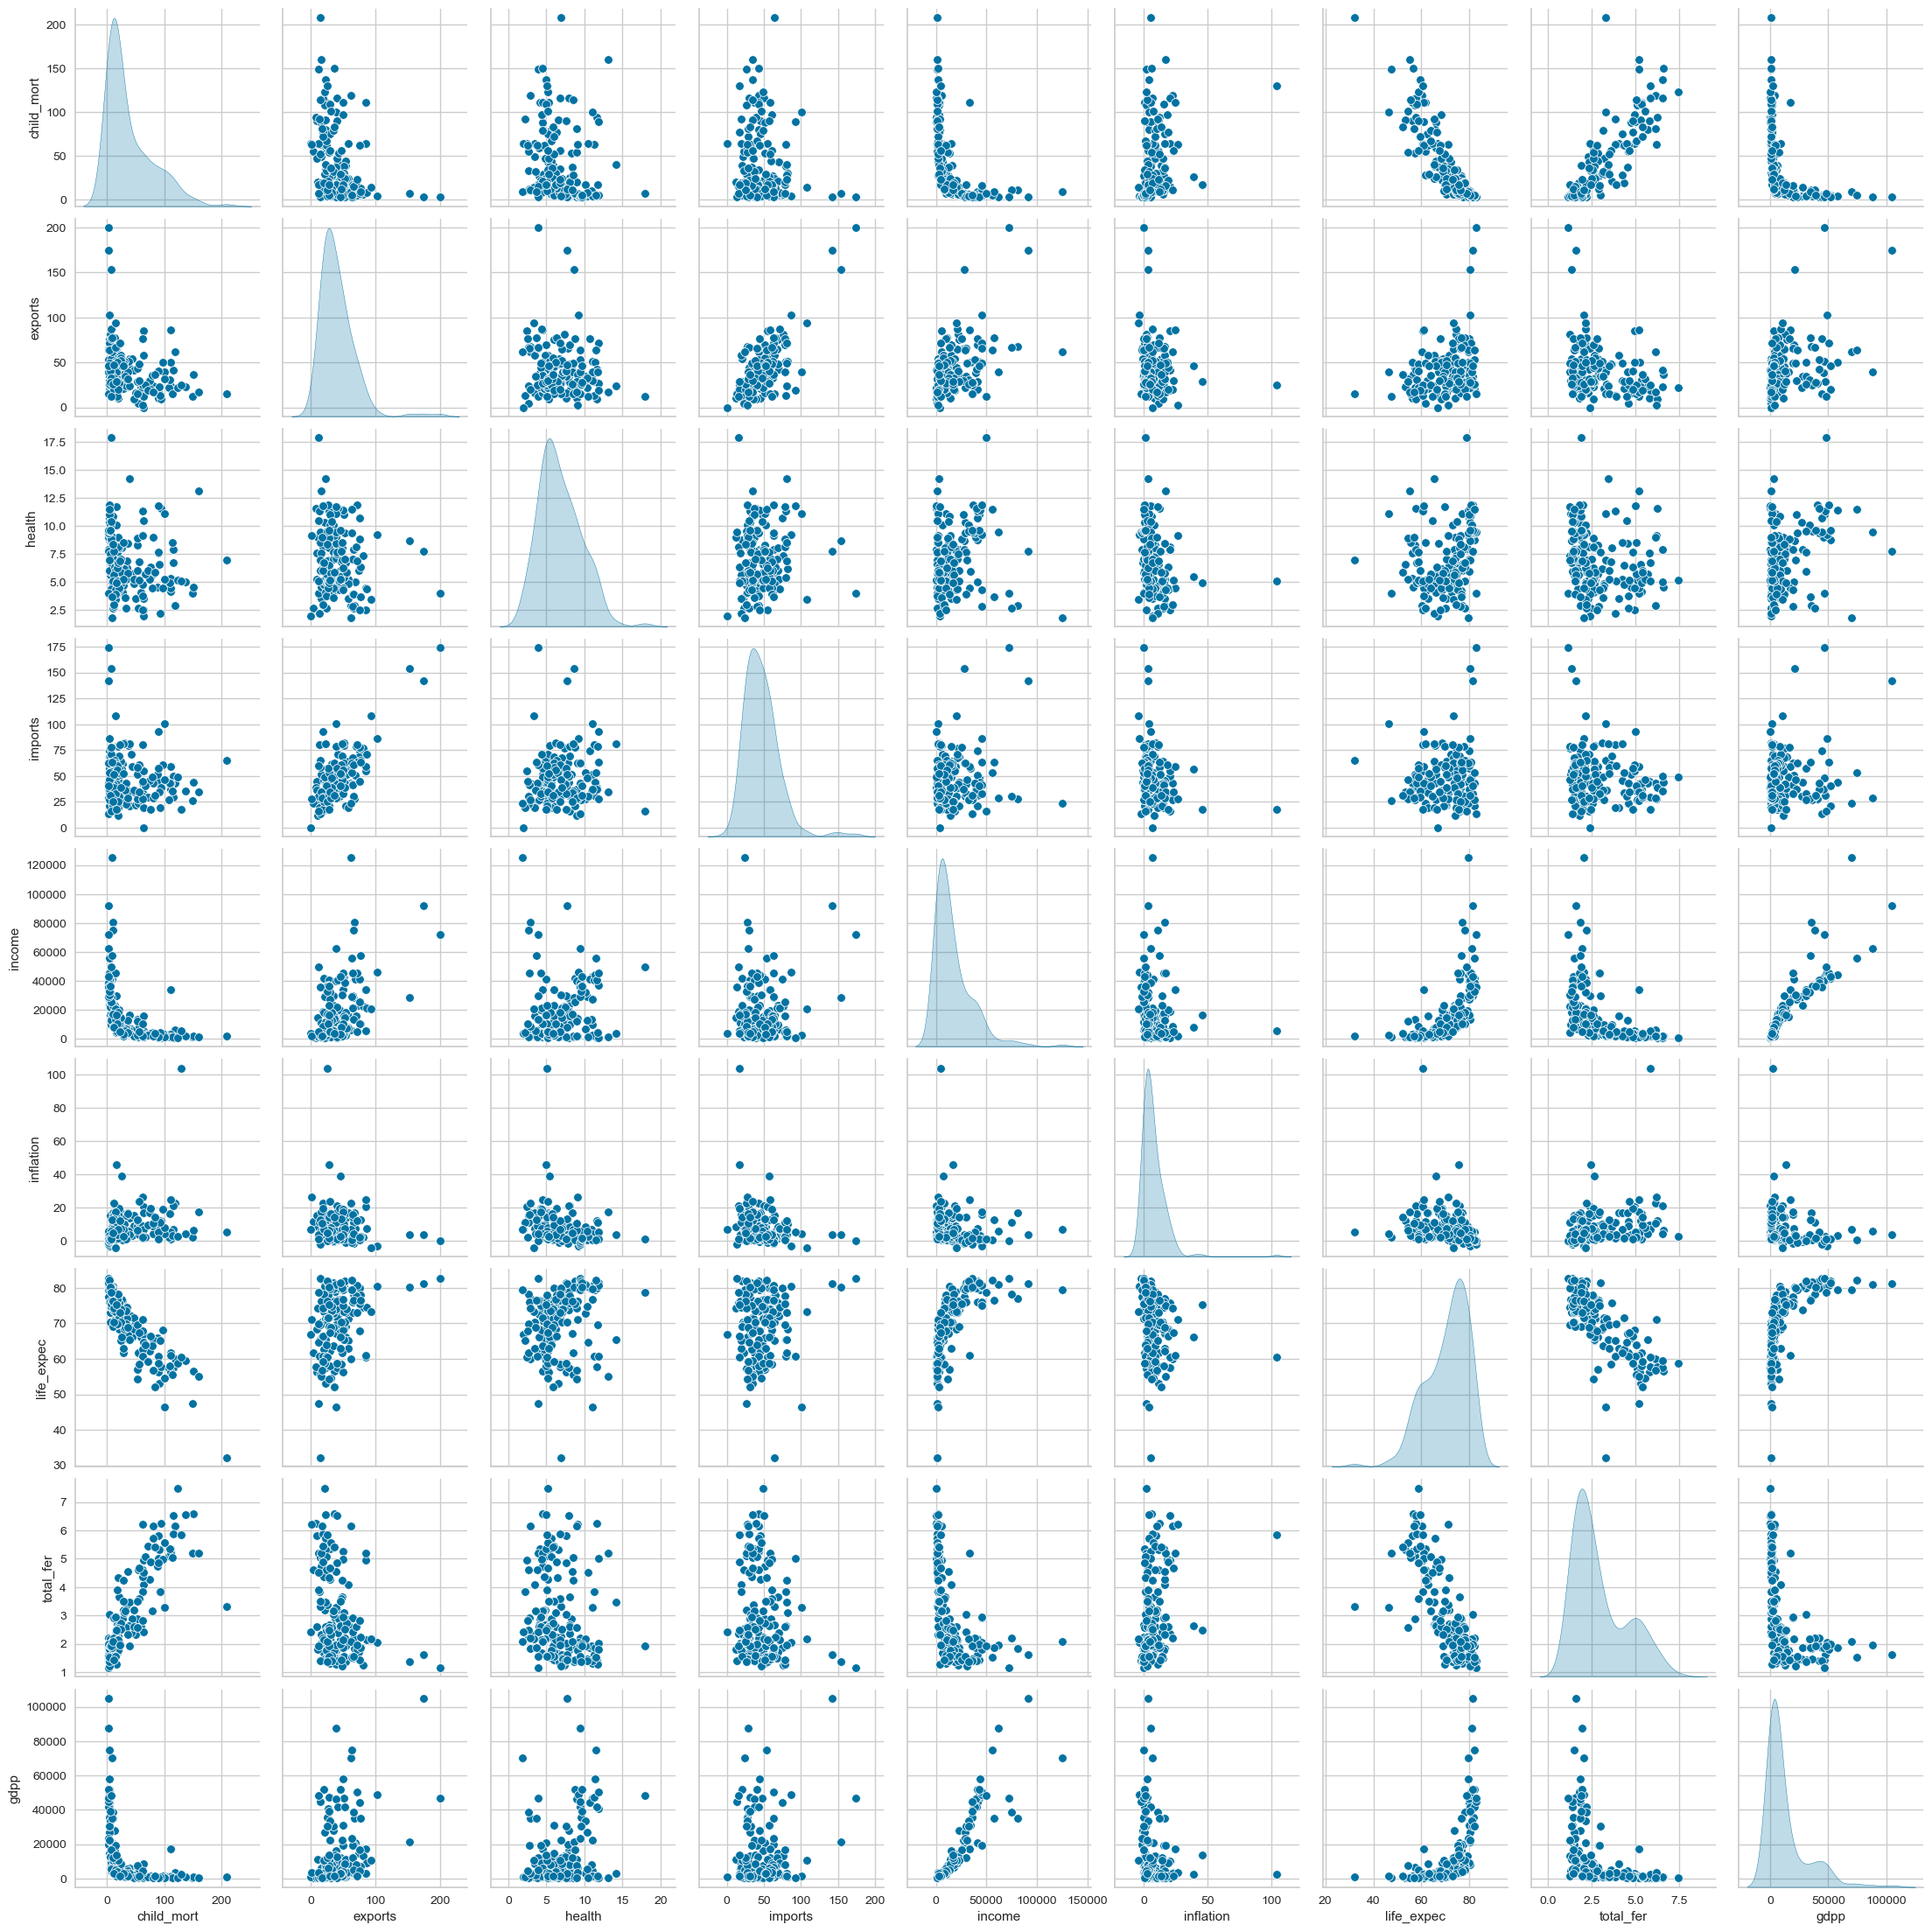

In [284]:
# Lets do the Multivariate anylysis

sns.pairplot(data,diag_kind='kde')
plt.show()

### PREPROCESSING

In [285]:
# Lets check for missing values

data.isnull().sum().sum()

# We can see their are no missing values

np.int64(0)

In [286]:
# Lets treat the extreme outliers

# We will go with capping using IQR method
# In order to cap only the extreme ones lets keep wisker length = 2.5


for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

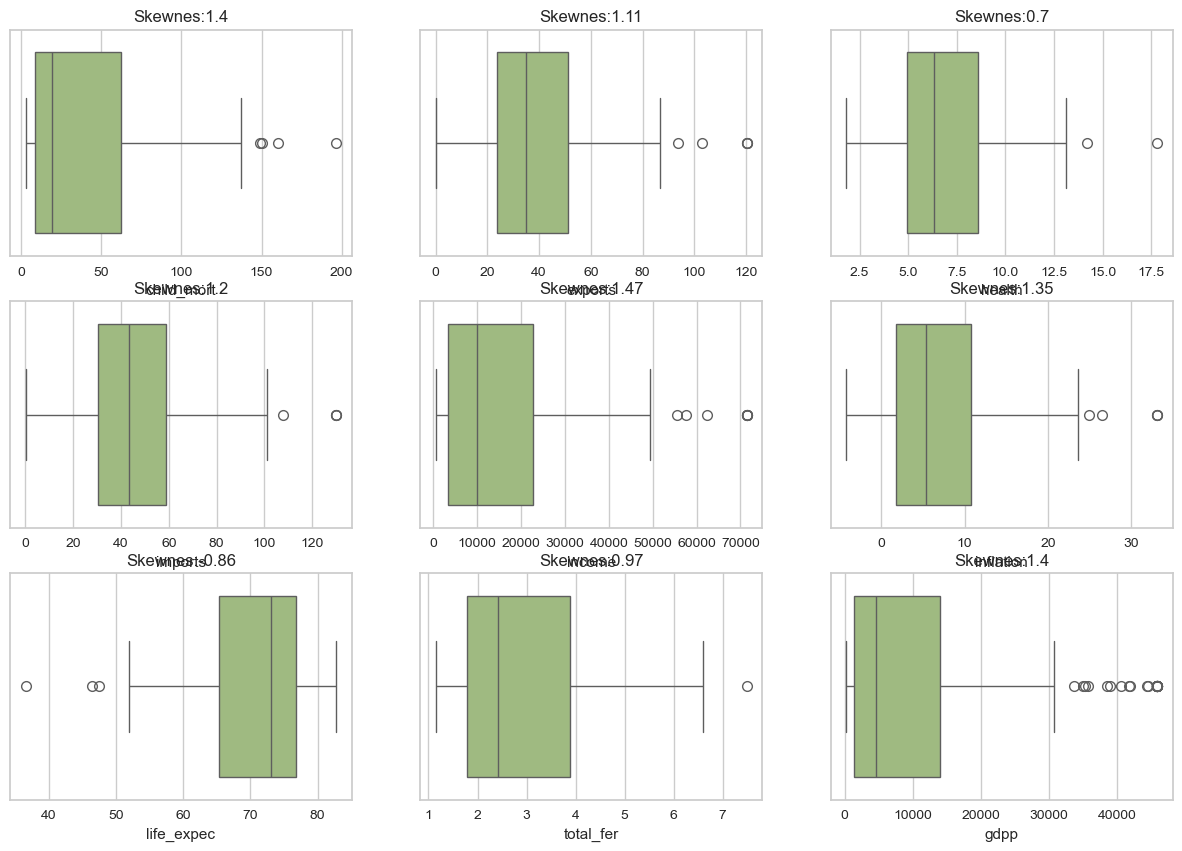

In [287]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='g')
    plt.title(f'Skewnes:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout
plt.show()

In [288]:
# Lets apply PCA on the data before we proceed with clustering, just to have better visualisation 
# and better clustering
# In PCA we need to pass standardised data, so lets import the functions from libraries

# Lets create an instance of scalling

scaler = StandardScaler()

# Also lets create and instance for PCA

pca = PCA(n_components=5,random_state=2)

# Lets create Pipeline for the above 2 processes

pipeline = Pipeline([('scaler', scaler),
    ('PCA', pca)])


In [289]:
pipeline.fit(data)

Pipeline(steps=[('scaler', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [290]:
pca.explained_variance_ratio_.cumsum()

# At n_components = 5, we are able to explain approx. 95% variance, which is good enough

# So 9-dimension data can be reduced to 5-dimension


array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [291]:
final_data = pipeline.transform(data)

In [292]:
# .transform return array lets convert it to dataframe.
final_data = pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119


### K-Means clustering

In [293]:
# Identify the value of K

# KElbow Visualizer

kelbow = KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

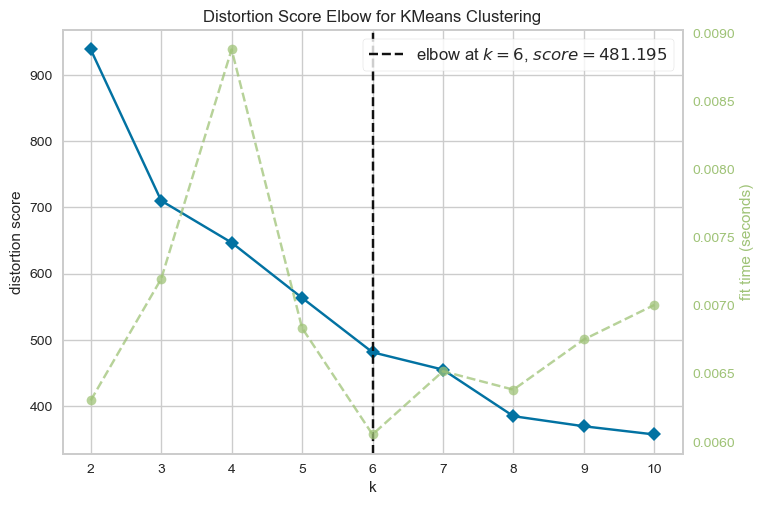

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [294]:
kelbow.fit(final_data)
kelbow.show()



Although the above plot marks the elbow at k=6, but we can see significant drop in distortion score
from k=2 to k=3. As we increase the number of clusters it might become overfitted to lets explore sillhouette
visualizer to identify the correct or more generalized value of k.

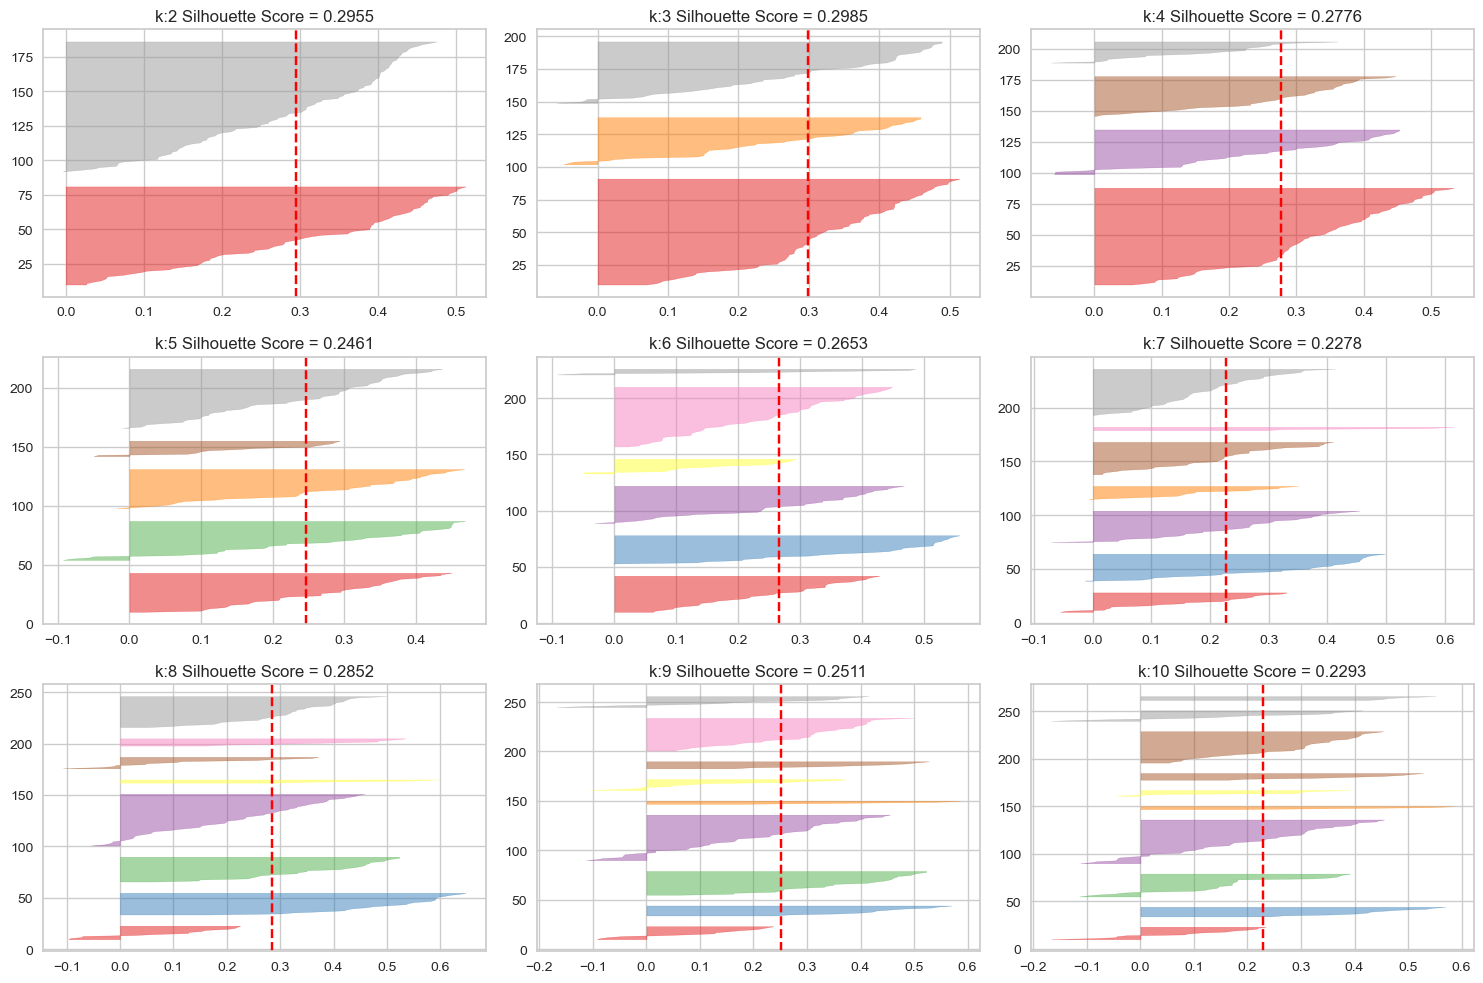

In [295]:
t = 1
plt.figure(figsize=(15, 10))

for i in range(2, 11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i, random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'k:{i} Silhouette Score = {round(sil_viz.silhouette_score_, 4)}')
    t+=1

plt.tight_layout()
plt.show()

After analysing elbow plot and silhouette visualizer lets go with k=3.
Although their are few data points which have been misclassified but we see no drop in silhouette score 
and their is good enough data in every cluster.
Also from Kelbow plot significant drop in WCSS(Distortion Score) was observed k=2 and k=3

In [296]:
final_kmeans = KMeans(n_clusters=3,random_state=2)

In [297]:
labels = final_kmeans.fit_predict(final_data)

In [298]:
# Lets check the Sillhouette Score as well

print('Sillhouette Score:',silhouette_score(final_data,labels))

Sillhouette Score: 0.29845782348296623


In [299]:
# Lets put these labels on PCA data

final_data['Labels'] = labels
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0


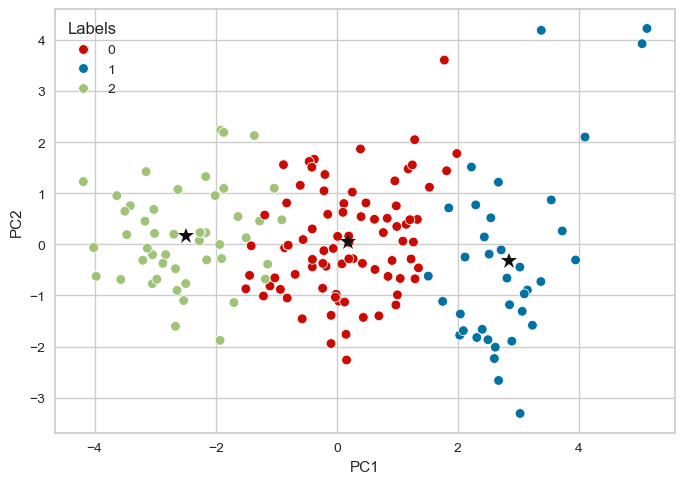

In [301]:
# Lets visualize the clusters

# In order to get the best visualization lets choose PC1 and PC2 as they have maximum variance


centroids = final_kmeans.cluster_centers_
centroids


sns.scatterplot(data=final_data,x='PC1',y='PC2',palette=['r','b','g'],hue='Labels')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='k')
plt.show()


## Business Interpretation

In [302]:
# To have business understanding lets put the lables on orignal dataset
data['Label'] = labels
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [303]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


After studying the above data we can conclude that countries that have been assigned in cluster 2 can 
be called under-developed countries while cluster 1 are developed countries. Countries belonging to cluster 0
are doing average in most of the factors but are struggling in some economic factors like gdpp, income and expenditure on health. Hence they can be called developing countries.

In [322]:
data['Label'] = data['Label'].map({0:'Developing',1:'Developed',2:'Underdeveloped'})
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label,label
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing,Developing


In [328]:
# Developed Countries

data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [329]:
data[data['Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

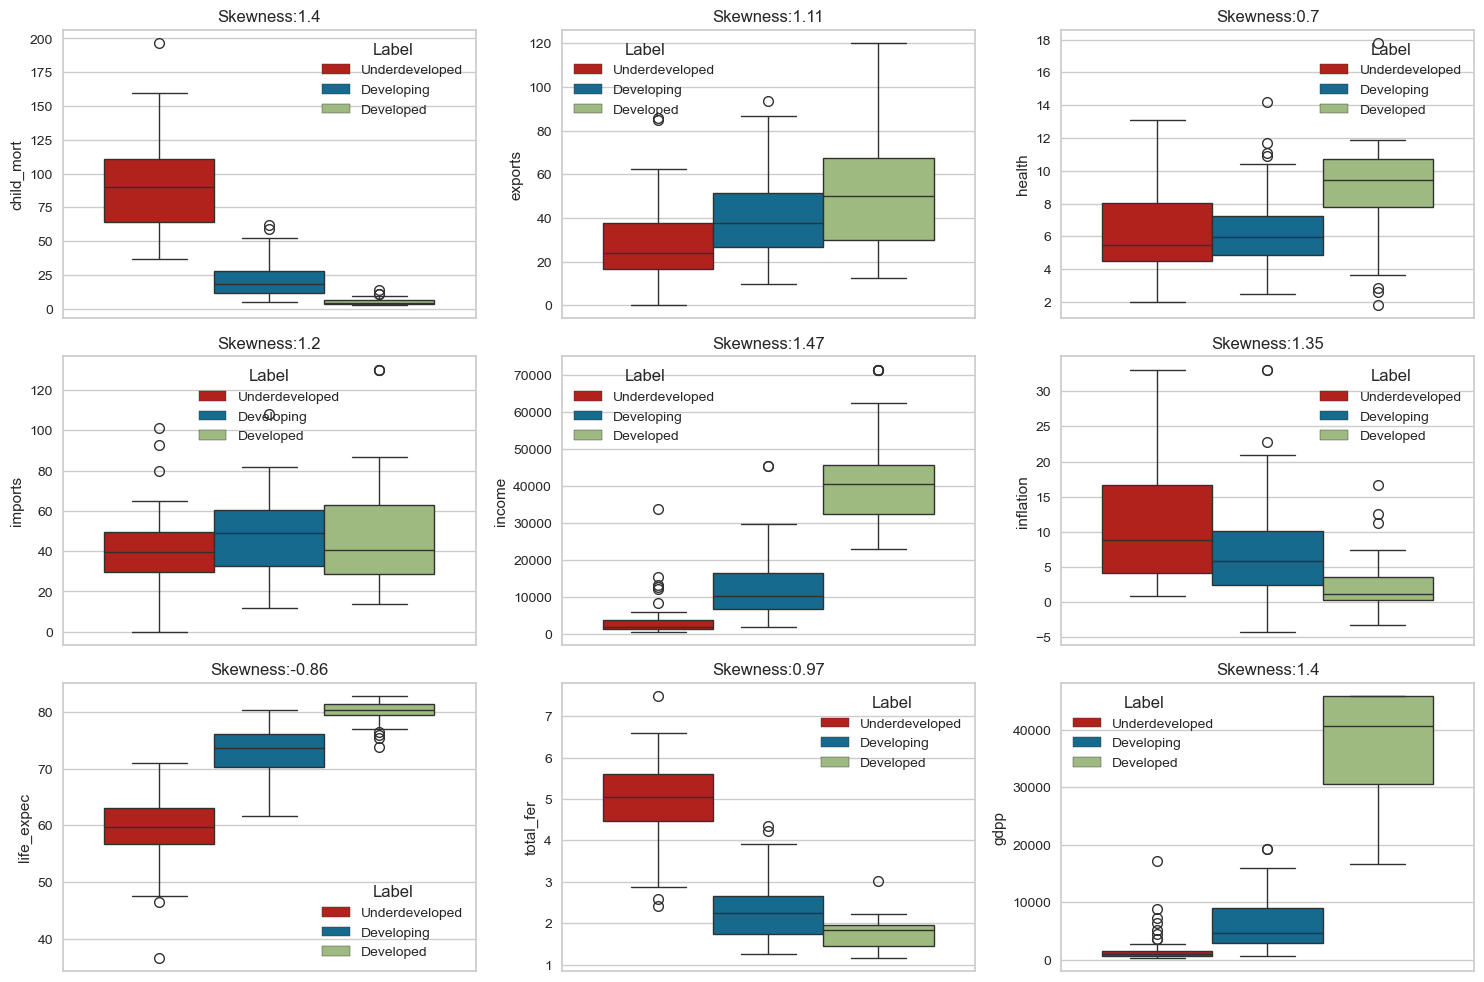

In [330]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    if i != 'Label':   
        plt.subplot(3,3,t)
        sns.boxplot(data=data,y=i,hue='Label',palette=['r','b','g'])
        plt.title(f'Skewness:{round(data[i].skew(),2)}')
        t+=1
plt.tight_layout()
plt.show()

In [332]:
# World Map

px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',
              color_discrete_map={'Underdeveloped' : 'red',
                                  'Developed' : 'green',
                                  'Developing' : 'blue'})